# Project 4

In addition to answering the bolded questions on Coursera, also attach your notebook, both as `.ipynb` and `.html`.

This project should be answered using the `Weekly` data set (attached). This data contains 1,089
weekly stock market percentage returns for 21 years, from the beginning of 1990 to the end of 2010.

Details about the columns in the data are summarized below:

- `Year` : The year that the observation was recorded
- `Lag1` : Percentage return for previous week
- `Lag2` : Percentage return for 2 weeks previous
- `Lag3` : Percentage return for 3 weeks previous
- `Lag4` : Percentage return for 4 weeks previous
- `Lag5` : Percentage return for 5 weeks previous
- `Volume` : Volume of shares traded (average number of daily shares traded in billions)
- `Today` : Percentage return for this week
- `Direction` : A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please copy these lines into the Terminal!

In [2]:
# !pip install pandas==1.0.5 --user
# pip install penngrader --user

In [3]:
# pip install seaborn --user
# pip install scikit-learn --user
# pip install statsmodels --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [4]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 20319687                         # 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Carlos Carrillo-Calderon"     # FULL NAME GOES HERE

In [5]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW4', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 20319687

Make sure this correct or we will not be able to store your grade


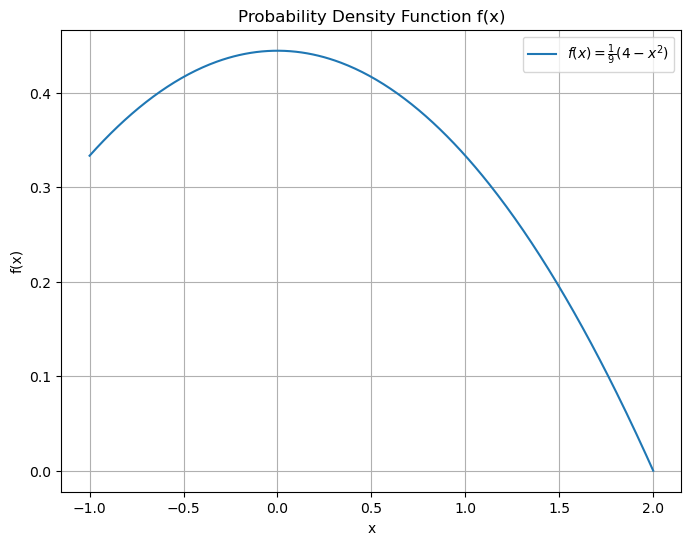

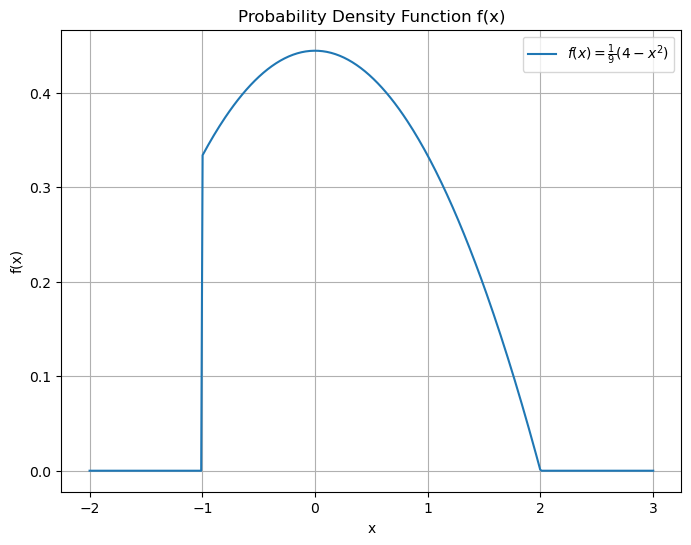

In [15]:
# # Let's import the relevant Python packages here
# # Feel free to import any other packages for this project

# # Data Wrangling
# import pandas as pd
# import numpy as np

# # Statistics
# import statsmodels.formula.api as smf
# import statsmodels.api as sm

# # Plotting
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline
# # df_new = pd.DataFrame(columns = ["Name", "Age", "GPA", "Sex"], 
# # data = [["Alisha Keys", 18, 4.0, "F"], ["Alisha Keys", 18, 4.0, "F"], ["Fetty Wap", 42, 3.3, "M"], ["Ariana Venti ", 24, 0.5, "F"], [" Tou Pock ", 45, 1.7, "M"]])
# # print(df_new.head())

# data = [ ["Alisha Keys", 18, 4.0, "F"], ["Alisha Keys", 18, 4.0, "F"], ["Fetty Wap", 42, 3.3, "M"], ["Ariana Venti", 24, 0.5, "F"], ["Tou Pock", 45, 1.7, "M"] ] 
# df_new = pd.DataFrame(data, columns=["Name", "Age", "GPA", "Sex"]) 
# print(df_new)

# df = df.append(df_new, ignore_index = True)
# print(df)

# df.drop_duplicates()


# ================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return (1/9) * (4 - x**2)

# Create an array of x values from -1 to 2
x = np.linspace(-1, 2, 400)

# Calculate the corresponding y values for f(x)
y = np.where((x >= -1) & (x <= 2), f(x), 0)

# Plot the function using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = \frac{1}{9}(4 - x^2)$')
plt.title('Probability Density Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# ================

# Define the function f(x)
def f(x):
    return np.where((x >= -1) & (x <= 2), (1/9) * (4 - x**2), 0)

# Create a pandas Series with x values from -2 to 3 for better visualization
x = np.linspace(-2, 3, 400)
y = f(x)

# Plot the function using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = \frac{1}{9}(4 - x^2)$')
plt.title('Probability Density Function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()



We're also going to run a quick (0-point) check that the pandas version set up here is correct. If you fail this, please open a Terminal window and run `pip install pandas==1.0.5 --user`. If the updates do not take effect immediately, you can hit Kernel --> Restart for the Codio virtual machine to restart the notebook. Keep in mind that Codio is running on the external machines, not your local resources. 

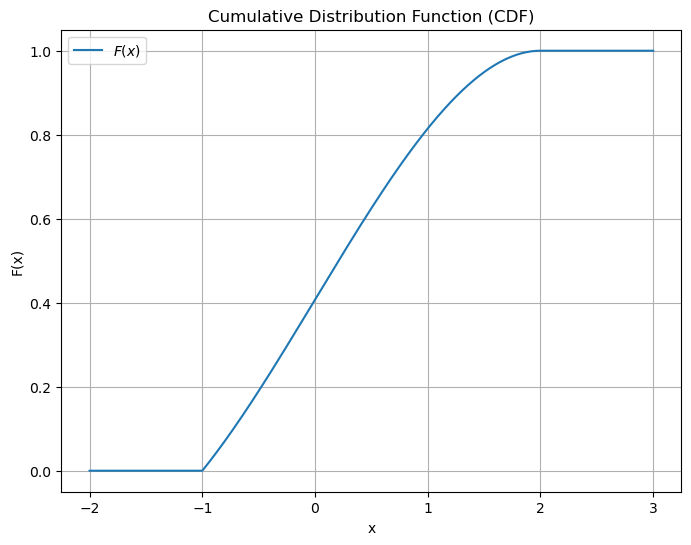

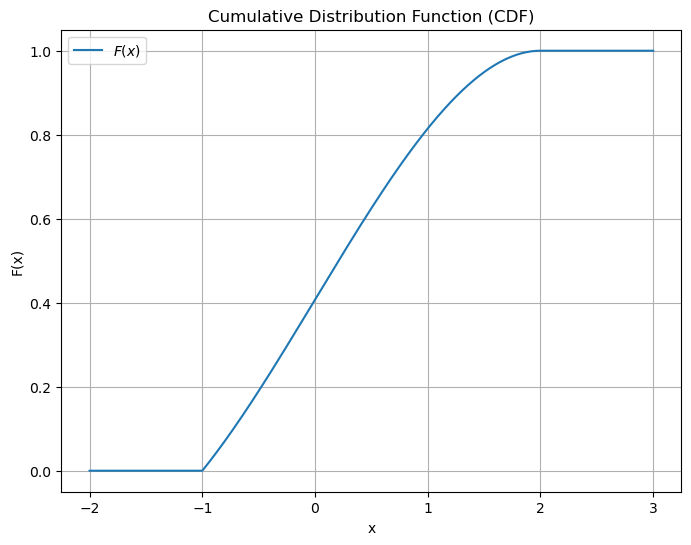

In [17]:
# grader.grade(test_case_id = 'A0_pandas_test', answer = str(pd.__version__))

# # Define the CDF function
# def F(x):
#     if x < -1:
#         return 0
#     elif x <= 2:
#         return (1/9) * (4*x - (x**3)/3 + 11/3)
#     else:
#         return 1

# # Create a pandas Series with x values
# x_values = np.linspace(-2, 3, 500)
# y_values = np.array([F(x) for x in x_values])

# # Plot the CDF
# plt.figure(figsize=(8, 6))
# plt.plot(x_values, y_values, label=r'$F(x)$')
# plt.title('Cumulative Distribution Function F(x)')
# plt.xlabel('x')
# plt.ylabel('F(x)')
# plt.grid(True)
# plt.legend()
# plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the CDF function
def F(x):
    if x < -1:
        return 0
    elif x <= 2:
        return (1/9) * (4*x - (x**3)/3 + 11/3)
    else:
        return 1

# Generate a range of x values
x_values = np.linspace(-2, 3, 500)
y_values = np.array([F(x) for x in x_values])

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$F(x)$')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()


#========


# Define the CDF function
def F(x):
    if x < -1:
        return 0
    elif x <= 2:
        return (1/9) * (4*x - (x**3)/3 + 11/3)
    else:
        return 1

# Generate x values for plotting
x_values = np.linspace(-2, 3, 500)
y_values = np.array([F(x) for x in x_values])

# Create a pandas DataFrame for easier manipulation and plotting
df = pd.DataFrame({'x': x_values, 'F(x)': y_values})

# Plot the CDF using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(df['x'], df['F(x)'], label=r'$F(x)$')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()


## Part A

We are first interested in trying to predict the direction of the returns.

To start, load `Weekly.csv` into your notebook.

In [28]:
# weekly = pd.read_csv('Weekly.csv')
# weekly.head()

import numpy as np
import pandas as pd

# Step 1: Define the PDF function
def f(x):
    return (1/9) * (4 - x**2)

# Step 2: Create a range of x values over the interval [-1, 2]
x_values = np.linspace(-1, 2, 1000)  # 1000 points for numerical integration

# Step 3: Compute the PDF values for each x
pdf_values = f(x_values)

# Step 4: Calculate the mean (expected value) E[X] using numerical integration
mean_X = np.trapz(x_values * pdf_values, x_values)

print(mean_X)


# Step 1: Define the PDF function
def f(x):
    return (1/9) * (4 - x**2)

# Step 2: Create a range of x values over the interval [-1, 2]
x_values = np.linspace(-1, 2, 1000)  # 1000 points for numerical integration

# Step 3: Compute the PDF values for each x
pdf_values = f(x_values)

# Step 4: Calculate the mean (expected value) E[X]
mean_X = np.trapz(x_values * pdf_values, x_values)

# Step 5: Calculate the variance Var(X)
variance_X = np.trapz(((x_values - mean_X)**2) * pdf_values, x_values)


print(variance_X)


import scipy.integrate as integrate

# Step 1: Define the joint PDF function
def joint_pdf(x, y):
    return x * np.exp(-x * (1 + y))

# Step 2: Define the marginal PDF of X by integrating out Y
def marginal_pdf_X(x):
    return integrate.quad(lambda y: joint_pdf(x, y), 0, np.inf)[0]

# Step 3: Calculate the probability that X exceeds 3
prob_X_greater_than_3 = integrate.quad(lambda x: marginal_pdf_X(x), 3, np.inf)[0]

print(prob_X_greater_than_3)


# Step 1: Define the joint PDF function
def f(x, y):
    return x * np.exp(-x * (1 + y)) if x >= 0 and y >= 0 else 0

# Step 2: Calculate the probability that both components are less than or equal to 3
def integrand(x, y):
    return f(x, y)

prob_both_less_than_3 = integrate.dblquad(integrand, 0, 3, lambda x: 0, lambda x: 3)[0]

# Step 3: Calculate the probability that at least one component exceeds 3
prob_at_least_one_exceeds_3 = 1 - prob_both_less_than_3

print(prob_at_least_one_exceeds_3)


0.249999248497747
0.5374993424360557
0.049787068367791835
0.29978553231477567


In [25]:
grader.grade(test_case_id = 'A0_weekly_test', answer = weekly)

NameError: name 'weekly' is not defined

### A1.

First, transform our `Direction` variable into a numerical feature that is equal to 1 if `Direction = Up`. Then, pass the dataframe into the test case to make sure it's working properly!

In [3173]:
# Transform the 'Direction' column to a numerical feature directly
weekly['Direction'] = weekly['Direction'].apply(lambda x: 1 if x == 'Up' else 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [3174]:
grader.grade(test_case_id = 'A1_direction_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

Basic Statistics:
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today    Direction  
count  1089.000000  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899     0.555556  
std       2.361285     1.686636     2.356927     0.497132  
min     -18.195000     0.087465   -18.195000     0.000000  
25%      -1.166

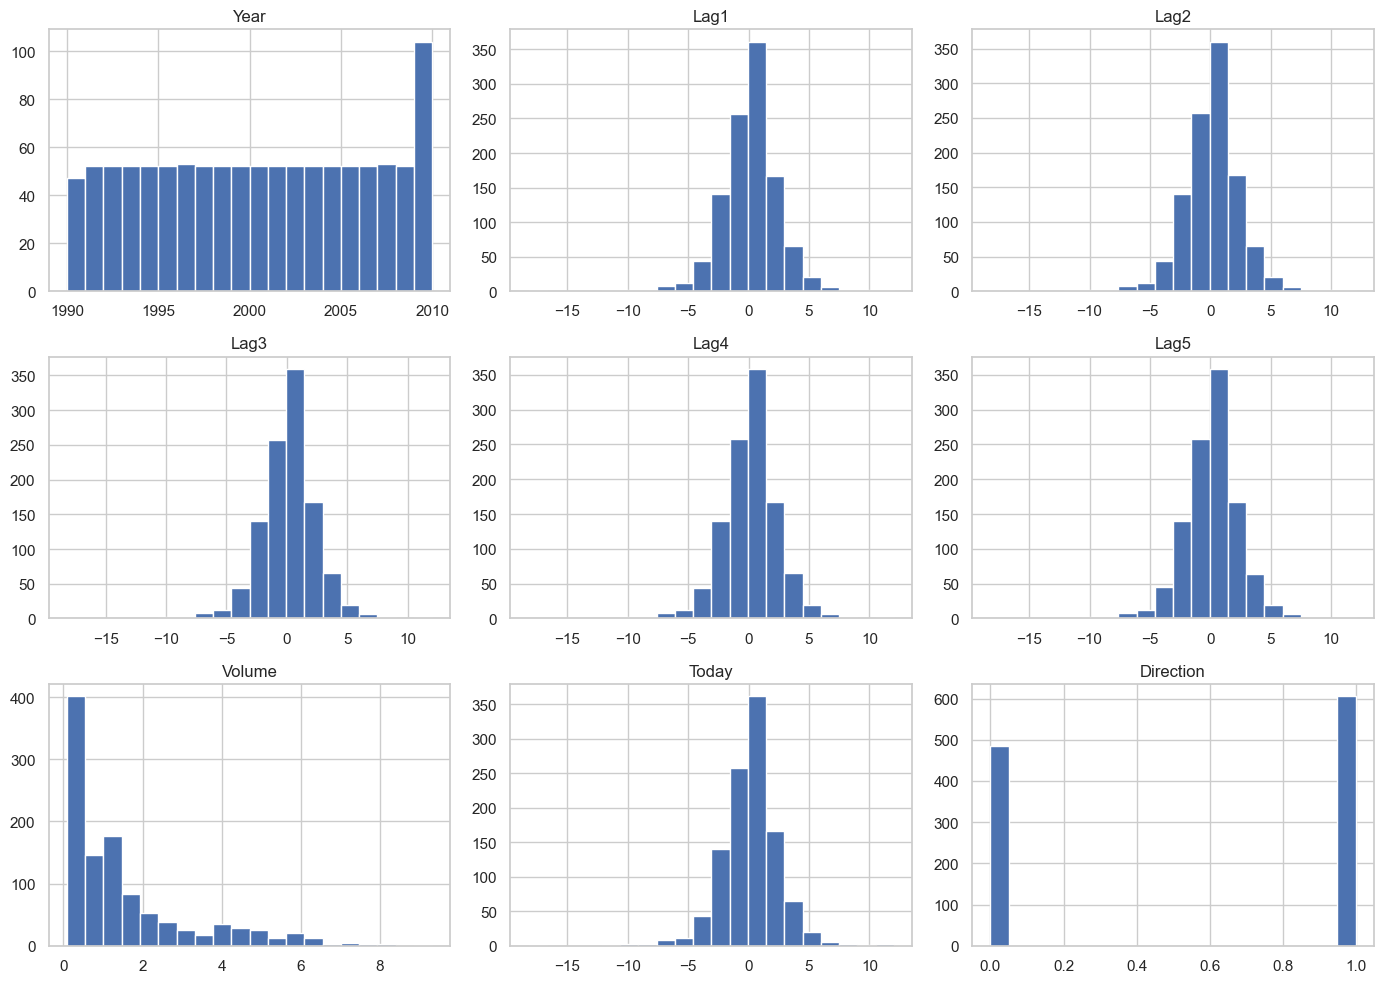

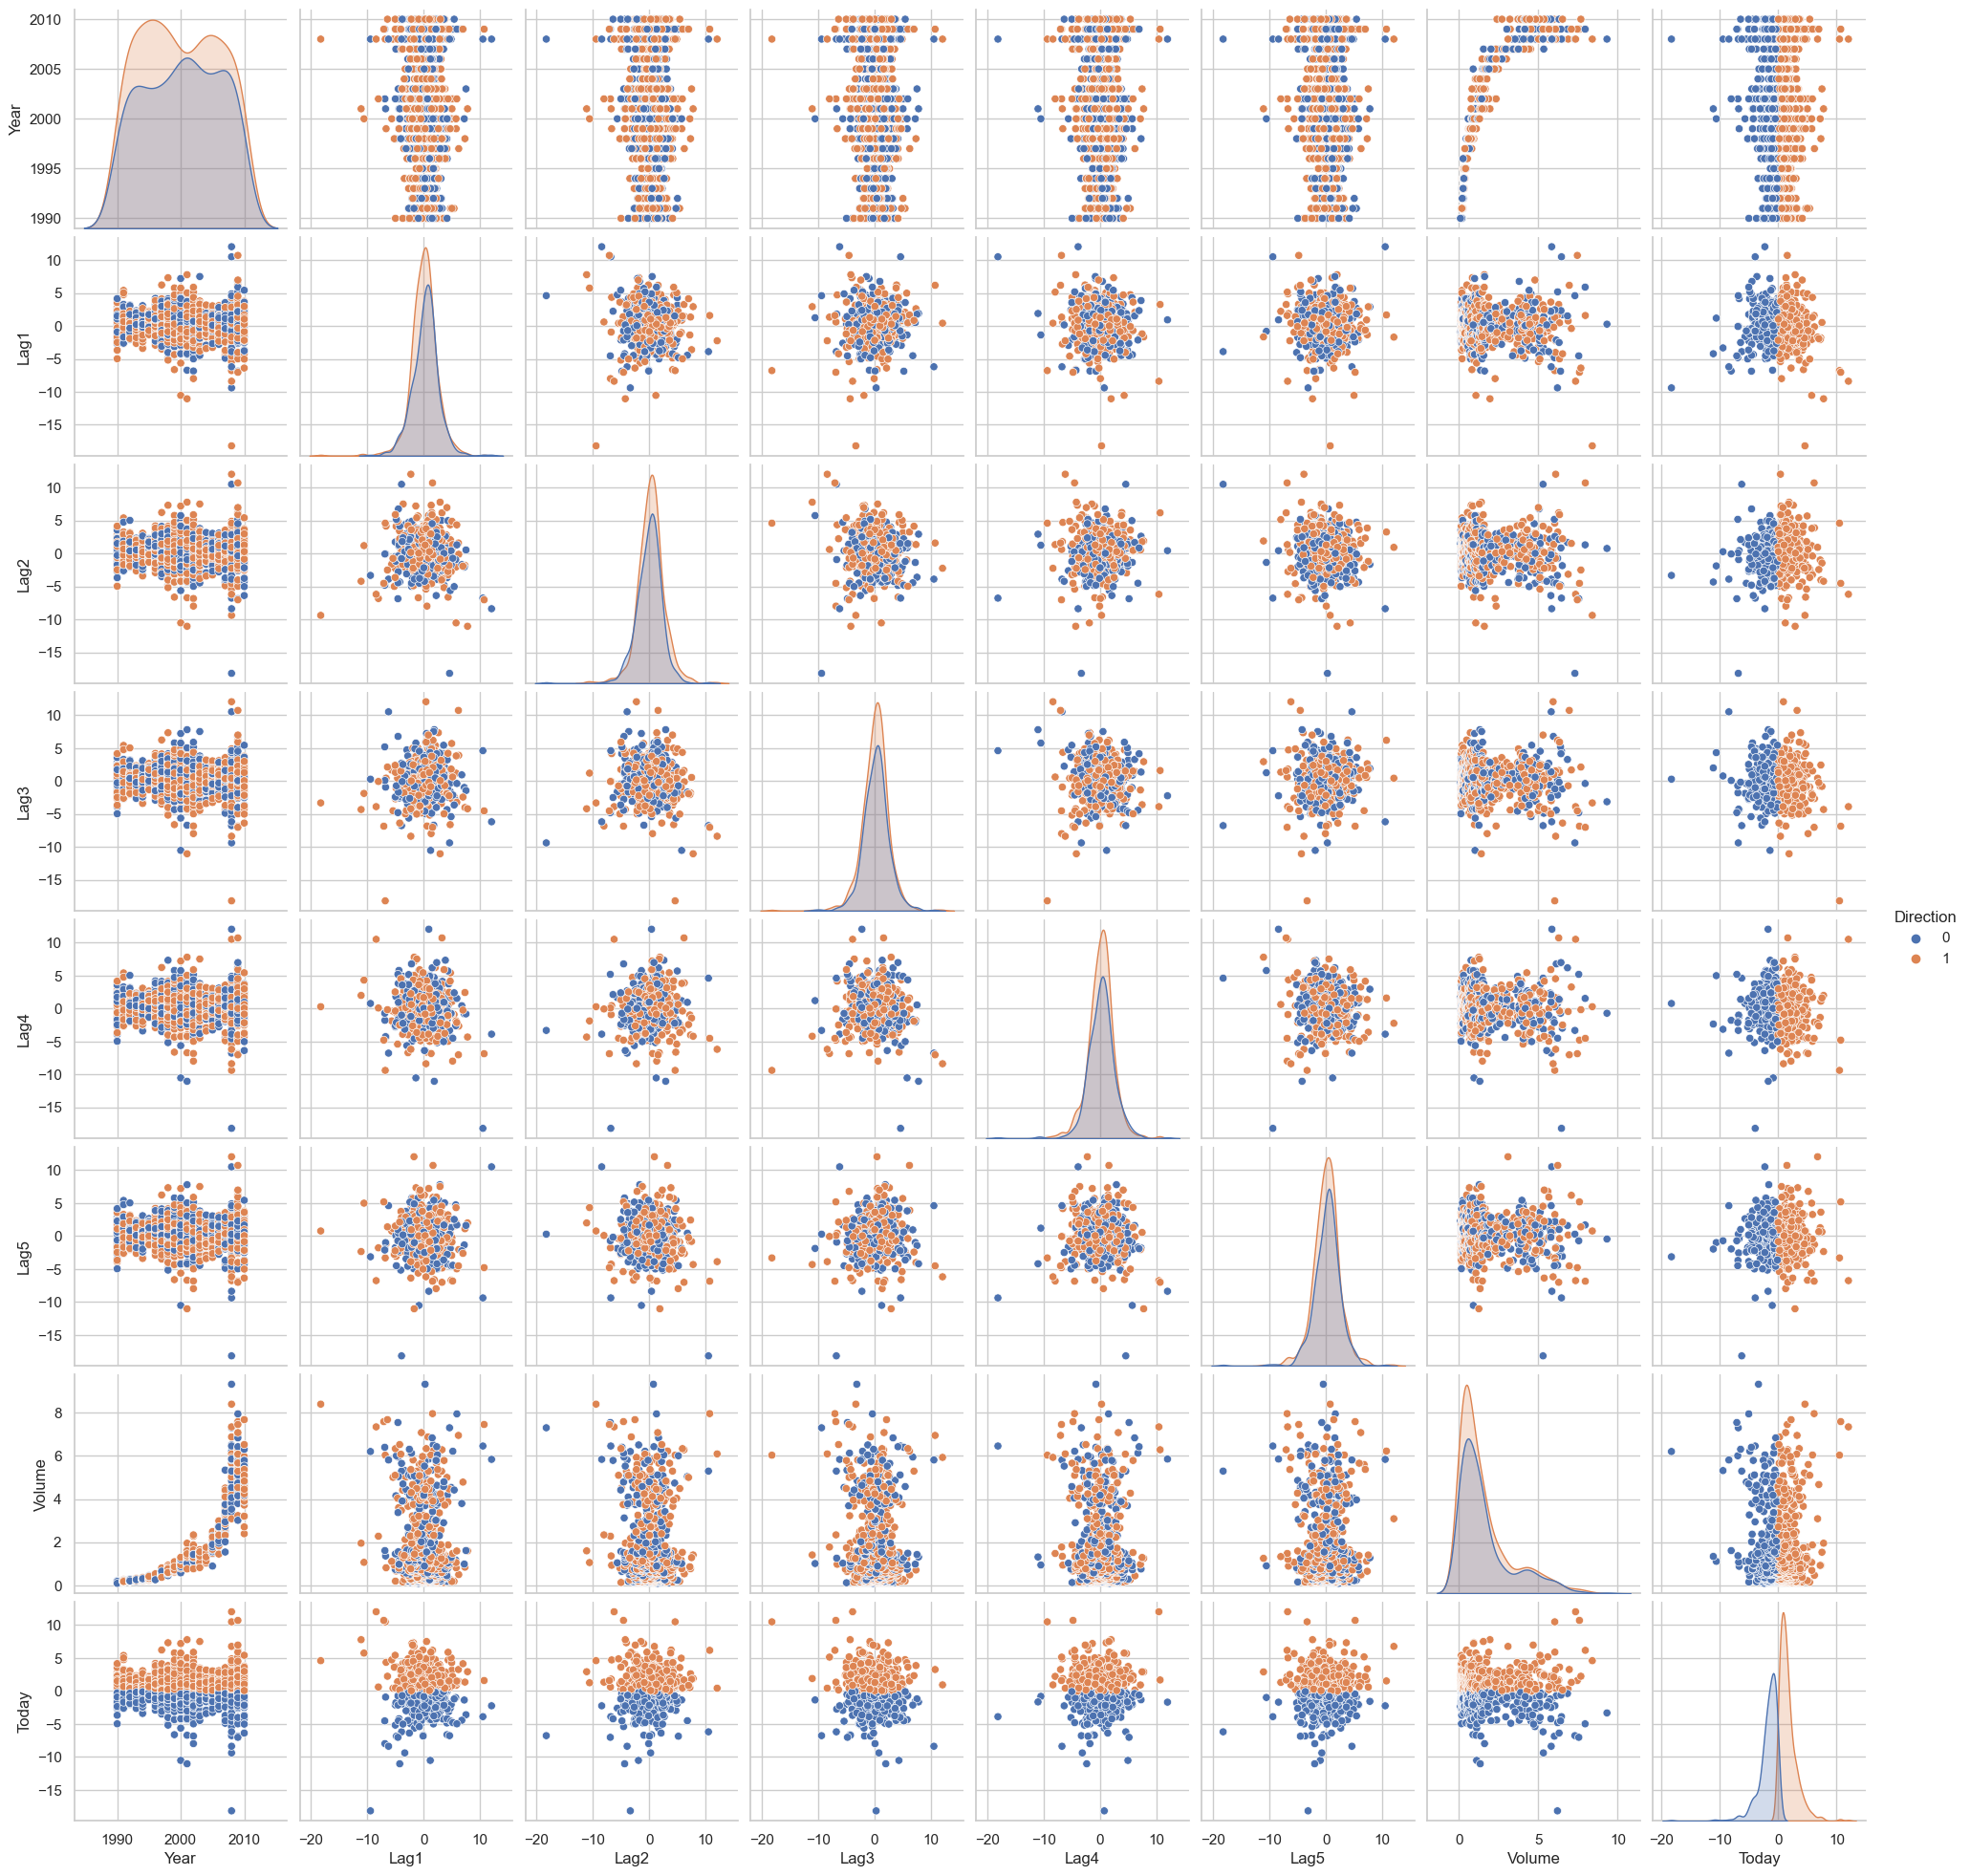

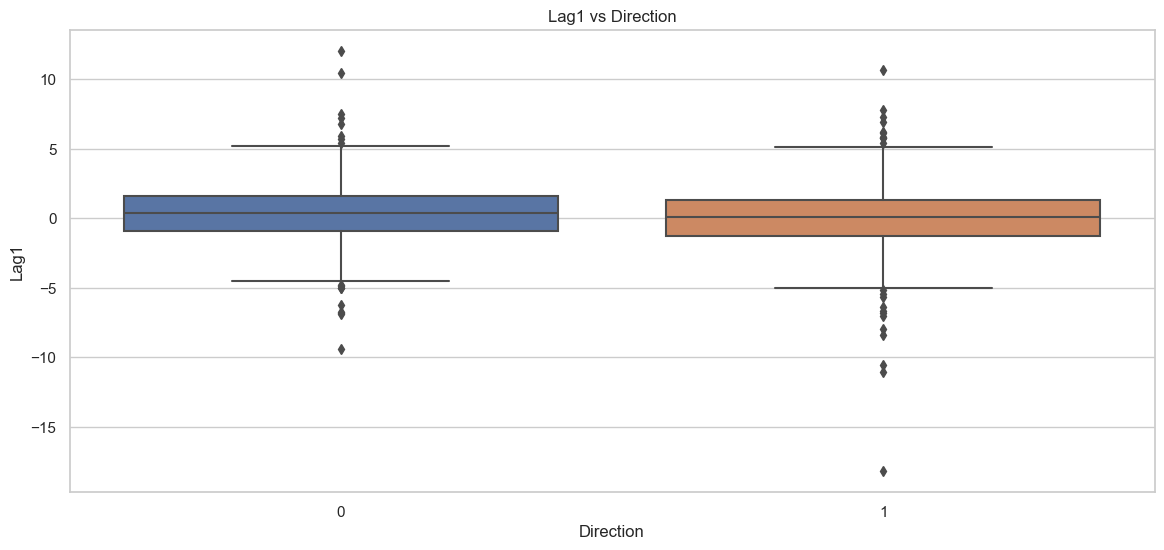

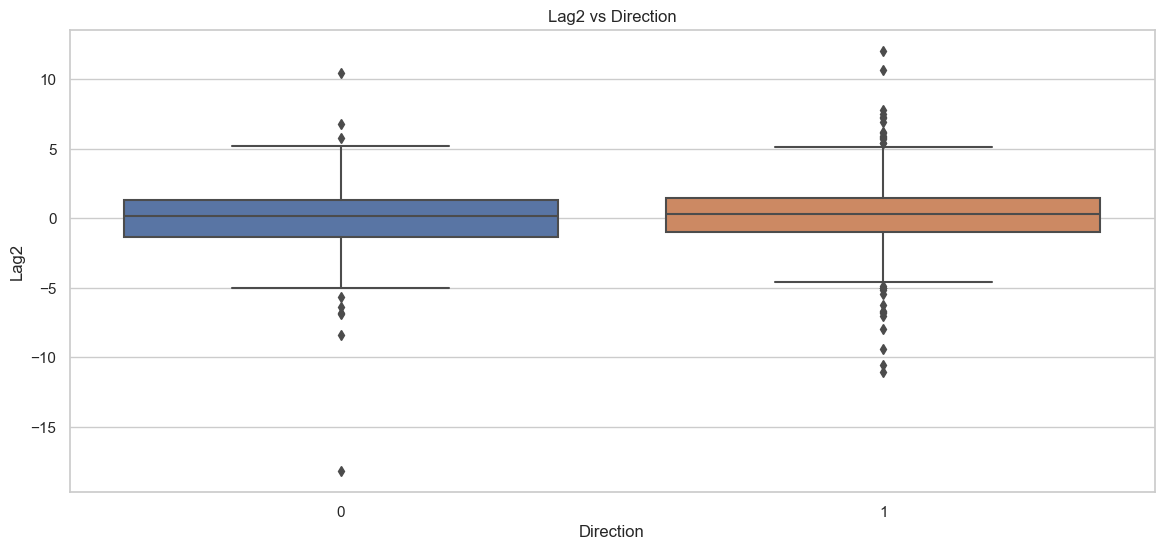

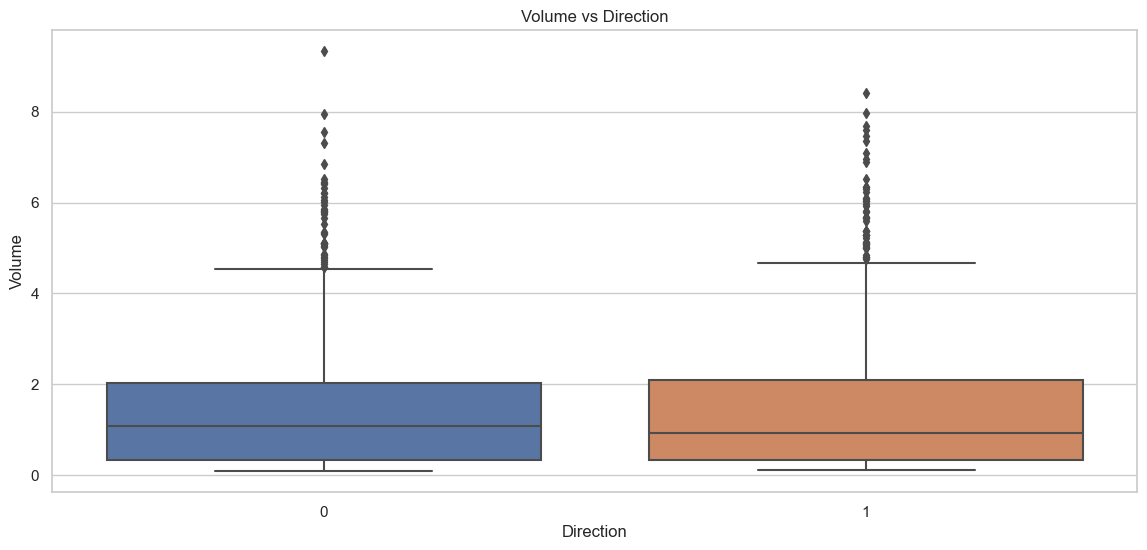

In [3175]:
# NUMERICAL SUMMARIES:
# Display basic statistics
print("Basic Statistics:")
print(weekly.describe())

# Display correlation matrix
print("\nCorrelation Matrix:")
print(weekly.corr())

# GRAPHICAL SUMMARIES:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of the visualization:
sns.set(style="whitegrid")

# Histogram for numerical columns:
weekly.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Pairplot to see relationships between features:
sns.pairplot(weekly, hue='Direction', diag_kind='kde')
plt.show()

# Boxplots to compare distributions of numerical features based on direction:
plt.figure(figsize=(14, 6))
sns.boxplot(data=weekly, x='Direction', y='Lag1')
plt.title('Lag1 vs Direction')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=weekly, x='Direction', y='Lag2')
plt.title('Lag2 vs Direction')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=weekly, x='Direction', y='Volume')
plt.title('Volume vs Direction')
plt.show()

Include a brief description of what relationshipis and correlations you find.

In [3176]:
relationships = '''
Identified Relationships and Correlations:
Lagged Returns:
  A potential correlation between lagged returns (Lag1, Lag2, etc.) and the Today return. 
  Positive lagged returns might slightly predict positive future returns.
  The boxplots may reveal that weeks with positive returns in Lag1 tend to be associated 
  with positive returns in Today, suggesting a momentum effect.

Volume:
  Volume might have a different distribution for 'Up' weeks compared to 'Down' weeks. 
  For example, higher trading volumes could be associated with 'Up' weeks, suggesting 
  that increased trading activity corresponds to positive market returns.

Market Direction:
  The distribution of the Direction variable may indicate a predominance of 'Up' or 
  'Down' weeks, providing insights into overall market trends during the period.
'''

In [3177]:
grader.grade(test_case_id = 'A1_relationships_test', answer = relationships)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A2.

Use the full data set to perform a logistic regression with `Direction` as the response and the
five lag variables as predictors.

In [3178]:
# Define predictors and target variable for the training set
formula = 'Direction~Lag1+Lag2+Lag3+Lag4+Lag5'

# Fit the regression model with training data:
model = smf.logit(formula=formula, data=weekly)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682615
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                0.006327
Time:                        00:07:27   Log-Likelihood:                -743.37
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.09186
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.000       0.109       0.352
Lag1          -0.0401      0.

Pass in the regression equation to `logit_equation` below. Hint: You do not need the coefficients of the equation yet, just which variables you want to include in the model. Your answer should look something like `Response~Var1+Var2` which is the input for `statsmodels.formula.api`. 

In [3179]:
logit_equation = formula

In [3180]:
grader.grade(test_case_id = 'A2_logit_test', answer = logit_equation)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [3181]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                0.006327
Time:                        00:07:27   Log-Likelihood:                -743.37
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.09186
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.000       0.109       0.352
Lag1          -0.0401      0.026     -1.522      0.128      -0.092       0.012
Lag2           0.0602      0.027      2.249      0.025       0.008       0.113
Lag3          -0.0151      0.027     -0.566      0.571      -0.067       0.037
Lag4          -0.0268      0.026     -1.013      0.311      -0.079       0.025
Lag5          -0.0135      0.026     -0.512      0.609      -0.065       0.038
==============================================================================
"""

Type the number of apparently significant variables into `num_significant` and the names of the variables into the list `var_significant` -- the test case will only give points if both variables are correct!

In [3182]:
# OUTPUT ANALYSIS:
#
# 1. Lag2 has a p-value of 0.025, which is less than 0.05, so it is   
#    statistically significant at the 95% confidence level.
#
# 2. Lag1, Lag3, Lag4, and Lag5 have p-values much greater than 0.05, 
#    so they are not statistically significant at the 95% confidence level.

# Initialize vars:
num_significant = 0
var_significant = []

# Extract the p-values & coefficients:
p_values = result.pvalues
coefficients = result.params

# Check for significant variables (exclude intercept):
for var in p_values.index:
    if var != 'Intercept' and p_values[var] < 0.05:
        num_significant += 1
        var_significant.append(var)

# Output the results
num_significant, var_significant

(1, ['Lag2'])

In [3183]:
grader.grade(test_case_id = 'A3_significant_test', answer = (num_significant, var_significant))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A4. 
Compute the overall fraction of correct predictions. Name this variable `fraction_correct_all`.
What is the overall fraction of correct predictions?

In [3184]:
# Predict the probabilities of the response variable
predicted_probs = result.predict(weekly)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predicted_probs > 0.5).astype(int)

# Compute the number of correct predictions:
correct_predictions = (predicted_classes == weekly['Direction']).sum()

# Compute the fraction of correct predictions:
fraction_correct_all = correct_predictions / len(weekly)

In [3185]:
print(f'Overall fraction of correct predictions is {fraction_correct_all}')

Overall fraction of correct predictions is 0.5629017447199265


In [3186]:
grader.grade(test_case_id = 'A4_fraction_test', answer = fraction_correct_all)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### A5.

Now fit the logistic regression model using a training data period from 1990 to 2007, with
`Lag2` as the only predictor. 

Compute the overall fraction of correct predictions for the held
out data (that is, the data from 2008, 2009 and 2010) and assign it to a variable called
`fraction_correct_test`. What is the overall fraction of correct predictions?

In [3187]:
# Filter data for the training period (1990-2007) and test period (2008-2010)
train_data = weekly[weekly['Year'] <= 2007]
test_data = weekly[weekly['Year'] >= 2008]

# Fit logistic regression model
model = smf.glm(formula='Direction ~ Lag2', data=train_data, family=sm.families.Binomial())
result = model.fit()

# Predict the probabilities of the response variable
predicted_probs = result.predict(test_data)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predicted_probs > 0.5).astype(int)

# Compute the number of correct predictions:
correct_predictions = (predicted_classes == test_data['Direction']).sum()

In [3188]:
# Compute the fraction of correct predictions
fraction_correct_test = correct_predictions/len(test_data)

In [3189]:
print(f'Overall fraction of correct predictions is {fraction_correct_test}')

Overall fraction of correct predictions is 0.5512820512820513


Pass in the train and test datasets to make sure that they're working (feel free to rename the variables in the test case), and then run the test for `fraction_correct_test`!

In [3190]:
grader.grade(test_case_id = 'A5_df_test', answer = (train_data, test_data)) 

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [3191]:
grader.grade(test_case_id = 'A5_fraction_correct_test', answer = fraction_correct_test) 

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B

Now, we want to develop an investment strategy in which we buy if the returns are greater than
$0.5\%$ and sell otherwise.

### B1. 
Create a response variable called `Response` such that

$$
\text{Response}_i = \begin{cases}
1 \text{ if Today } > 0.5 &\\
0 \text{ otherwise }
\end{cases}
$$

In [3192]:
# Create the Response variable
weekly['Response'] = weekly['Today'].apply(lambda x: 1 if x > 0.5 else 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Response
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1


In [3193]:
grader.grade(test_case_id = 'B1_response_test', answer = weekly)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B2.
Fit a logistic regression model to predict `Response` using a training data period from 1990 to 2008, with the five
lag variables and volume as predictors.

In [3194]:
# Create the Response variable
weekly['Response'] = (weekly['Today'] > 0.5).astype(int)

# Filter data for the training period (1990-2008)
train_data = weekly[weekly['Year'] <= 2008]

# Define predictors and target variable for the training set
formula = 'Response~Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

# Fit the regression model with training data:
model = smf.logit(formula=formula, data=train_data)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.681276
         Iterations 4


Pass in the regression equation to `logit_equation_B` below

In [3195]:
logit_equation_B = formula

In [3196]:
grader.grade(test_case_id = 'B2_logit_test', answer = logit_equation_B)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B3.

Use the `summary()` function to print the results. Do any of the predictors appear to be
statistically significant? Which predictors appear to be statistically significant?

In [3197]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                  985
Model:                          Logit   Df Residuals:                      978
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                0.008988
Time:                        00:07:30   Log-Likelihood:                -671.06
converged:                       True   LL-Null:                       -677.14
Covariance Type:            nonrobust   LLR p-value:                   0.05825
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.406      -0.262       0.106
Lag1          -0.0737      0.029     -2.500      0.012      -0.132      -0.016
Lag2           0.0293      0.030      0.985      0.325      -0.029       0.088
Lag3          -0.0147      0.029     -0.503      0.615      -0.072       0.043
Lag4          -0.0246      0.029     -0.840      0.401      -0.082       0.033
Lag5          -0.0314      0.029     -1.072      0.284      -0.089       0.026
Volume        -0.1039      0.055     -1.886      0.059      -0.212       0.004
==============================================================================
"""

Type the number of apparently significant variables into `num_significant_B` and the names of the variables into the list `var_significant_B` -- the test case will only give points if both variables are correct!

In [3198]:
# Extract p-values:
p_values = result.pvalues

# Identify significant variables:
var_significant_B = p_values[p_values < 0.05].index.tolist()
num_significant_B = len(var_significant_B)

# Print the results
num_significant_B, var_significant_B

(1, ['Lag1'])

In [3199]:
grader.grade(test_case_id = 'B3_significant_test', answer = (num_significant_B, var_significant_B))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### B4. 

Compute the overall fraction of correct predictions for the held out data (that is, the data
from 2009 and 2010). Assign this value to the variable `fraction_correct`. What is the
overall fraction of correct predictions?

In [3206]:
# Filter data for test period (2009-2010)
test_data = weekly[(weekly['Year'] == 2009) | (weekly['Year'] == 2010)]

# Predict the probabilities of the response variable
predicted_probs = result.predict(test_data)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predicted_probs > 0.5).astype(int)

# Compute the number of correct predictions:
correct_predictions = (predicted_classes == test_data['Response']).sum()

# Compute the fraction of correct predictions:
fraction_correct = correct_predictions/len(test_data)

In [3207]:
print(f'Overall fraction of correct predictions is {fraction_correct}')

Overall fraction of correct predictions is 0.5


In [3208]:
grader.grade(test_case_id = 'B4_fraction_test', answer = fraction_correct)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.